In this python fill we do some basic plotting using matplotlib and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv( "C:\Datasets\cleaned_patients.csv" )

In [3]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Stay Duration
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55387,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55388,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55389,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55390,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


### Which Age group is mostly hospitilized ?

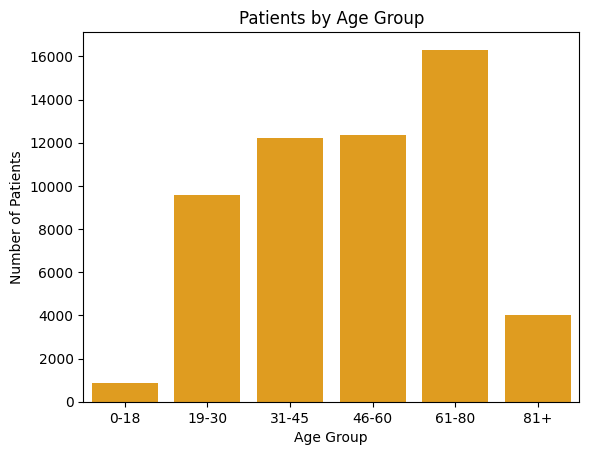

In [8]:
bins = [0, 18, 30, 45, 60, 80, 120]
labels = ['0-18','19-30','31-45','46-60','61-80','81+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


sns.countplot(x='Age Group', data=df,color = 'orange')
plt.title('Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


### Insight :
- Most patients are in the **46–60** age group.  
- Young adults (19–30) and seniors (81+) have comparatively fewer admissions.  
- This suggests **middle-aged patients are hospitalized more frequently** in this dataset.


### Which gender has the highest number of admissions?

Gender
Male      27726
Female    27666
Name: count, dtype: int64


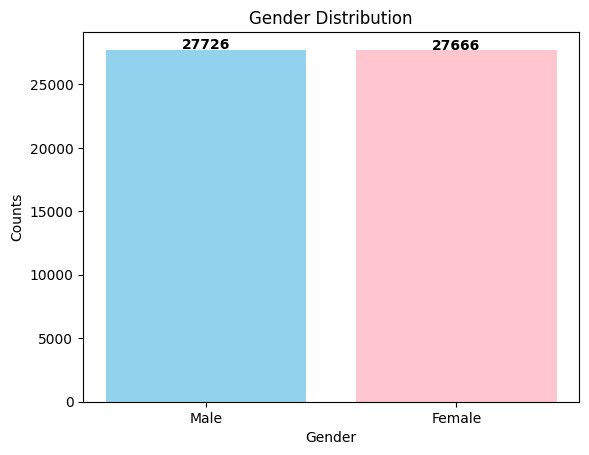

In [11]:
#Which gender is more admitted using matplotlib

gender_count = df [ 'Gender' ] . value_counts()
print ( gender_count )

plt.bar( gender_count.index , gender_count.values , color = [ 'skyblue' ,  'Pink' ] , alpha = 0.9)
plt.xlabel ( 'Gender' )
plt.ylabel ( 'Counts' )
plt.title ( 'Gender Distribution' )

# Add labels on top of bars
for i, value in enumerate(gender_count.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=10, fontweight='bold')

plt.show()

### Insight 
- The distribution of patients by gender shows a relatively small difference, indicating that both genders are almost equally represented in admissions.

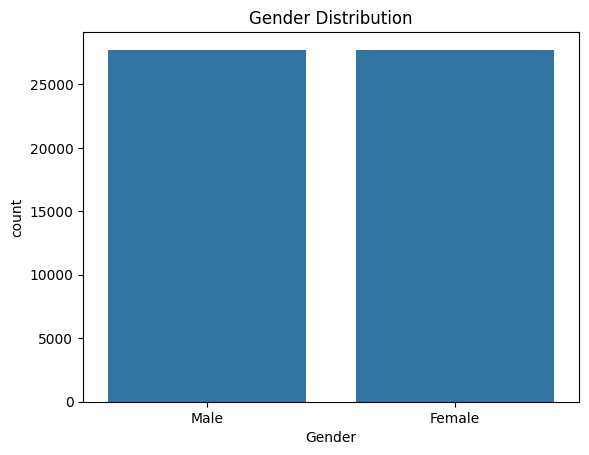

In [12]:
#In seaborn there is dedicated plot for counts which made easier for plotting
#using seaborn
sns.countplot ( x = 'Gender' , data = df ) 
plt.title ( 'Gender Distribution' ) 
plt.show()

In [37]:
genderBlood = df.groupby ( 'Gender' ) [ 'Blood Type' ].value_counts().unstack()
genderBlood

Blood Type,A+,A-,AB+,AB-,B+,B-,O+,O-
Gender,,,,,,,,
Female,3555,3436,3433,3454,3373,3453,3458,3504
Male,3384,3517,3504,3475,3563,3480,3447,3356


### How does the distribution of blood types vary between male and female patients?

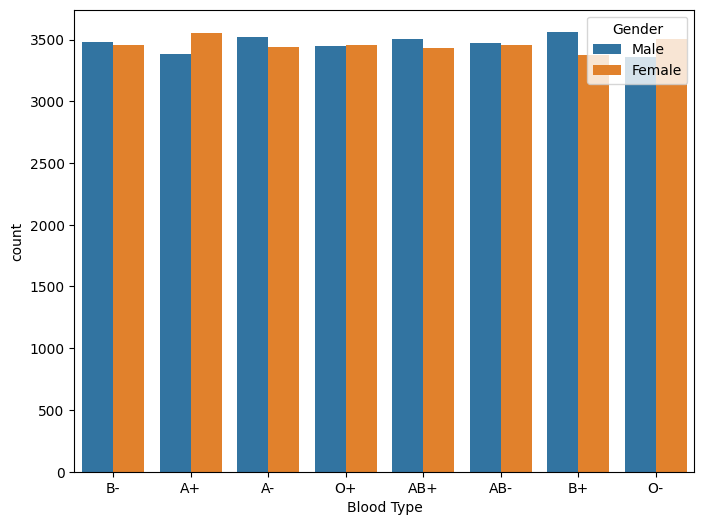

In [38]:
plt.figure ( figsize = ( 8 , 6 ) )
sns.countplot( x = 'Blood Type' , hue = 'Gender' , data = df  )
plt.show()

### Which admission type is most common?

Admission Type
Elective     18618
Urgent       18538
Emergency    18236
Name: count, dtype: int64


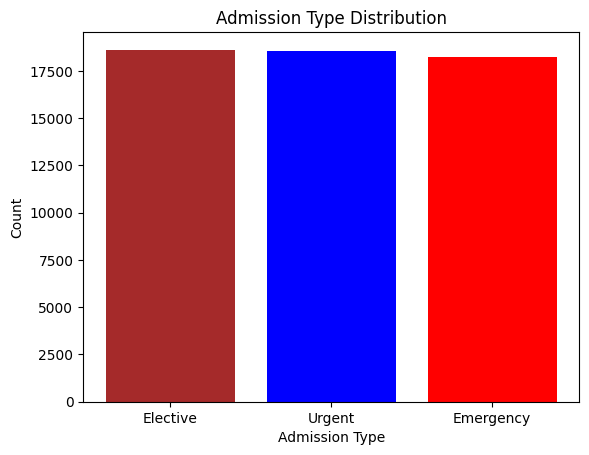

In [39]:
Admission_count = df [ 'Admission Type' ] .value_counts()
print( Admission_count )

plt.bar ( Admission_count.index , Admission_count.values , color = [ 'brown' , 'blue' , 'red' ] )
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Admission Type Distribution')
plt.show()

### Insights:
Elective admissions are slightly higher compared to Urgent and Emergency admissions, indicating a fairly balanced distribution among admission types.

### How does the distribution of admission types differ between male and female patients?

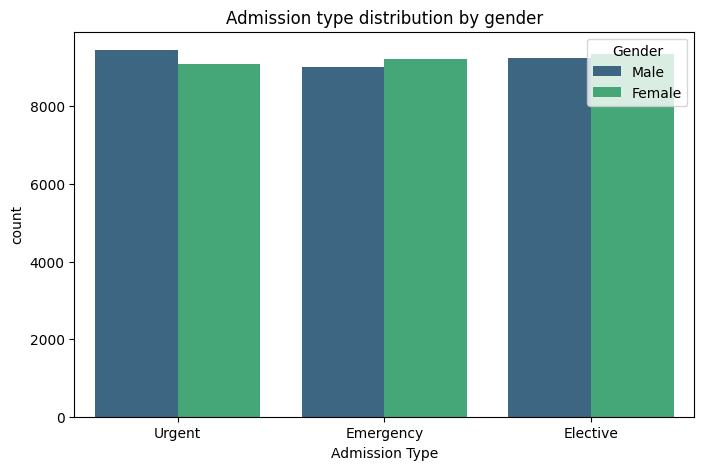

In [40]:
#Admission Distribution by gender

plt.figure ( figsize = ( 8 , 5 ) )
sns.countplot( x = 'Admission Type' , data = df , hue = 'Gender' ,  palette = 'viridis' )
plt.title( 'Admission type distribution by gender' )
plt.show()

### Insight:
The gender-wise distribution shows that both males and females have similar admission patterns across all types, but we can see in urgent there are more number of males than females.

### Which Medical condition is most common ?

In [41]:
df[ 'Medical Condition' ] .value_counts()

Medical Condition
Arthritis       9297
Diabetes        9284
Hypertension    9224
Obesity         9212
Cancer          9208
Asthma          9167
Name: count, dtype: int64

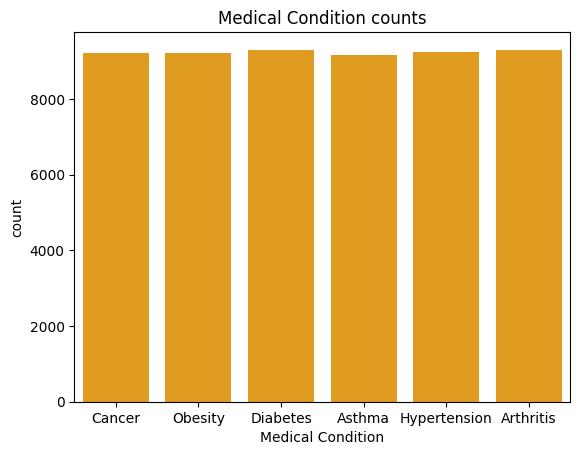

In [42]:
# Which medical condition is most common ?

sns.countplot( x = 'Medical Condition' , data = df , color = 'Orange')
plt.title( "Medical Condition counts" )
plt.show()

### Insights:
- We can see that Arthritis has higher number of patients and Asthma has lowest.
- However, the counts for all conditions are quite close, indicating that no single condition strongly dominates the patient population.

### Which medical condition generates the highest billing?

In [43]:
# Which medical condition generates the highest billing?
#Billing Amount by Medical Condition


Billbycondition = df.groupby ( 'Medical Condition' ) [ 'Billing Amount' ].sum().reset_index()

Billbycondition['Billing Amount' ] = Billbycondition[ 'Billing Amount' ] .astype( int )
Billbycondition[ 'Billing Amount( in millions)' ] = ( Billbycondition [ 'Billing Amount' ]/ 1000000 ).round(2 )

Billbycondition

,Medical Condition,Billing Amount,Billing Amount( in millions)
0,Arthritis,237334967,237.33
1,Asthma,235469671,235.47
2,Cancer,232178864,232.18
3,Diabetes,238547767,238.55
4,Hypertension,235729412,235.73
5,Obesity,238225285,238.23


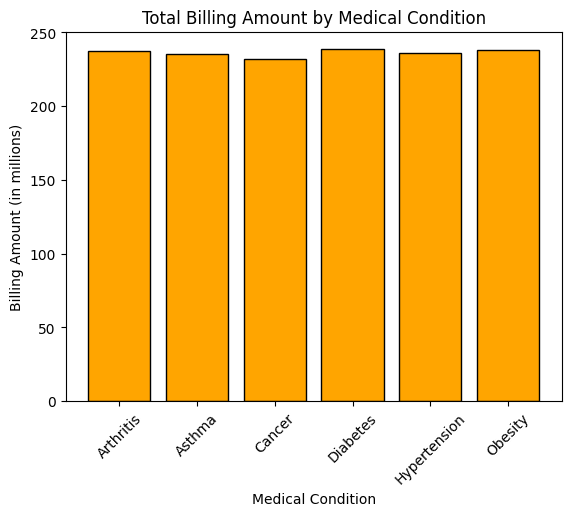

In [44]:
#Graph
# Which medical condition generates the highest billing?

plt.bar(Billbycondition['Medical Condition'], Billbycondition['Billing Amount( in millions)'], color='orange', edgecolor='black')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount (in millions)')
plt.title('Total Billing Amount by Medical Condition')
plt.xticks(rotation=45)
plt.show()


### Insights:
Diabetes has the highest total billing (₹238.55 million), followed closely by Obesity (₹238.23 million) and Arthritis (₹237.33 million). The billing amounts for all conditions are very close, showing no single condition strongly dominates revenue generation.

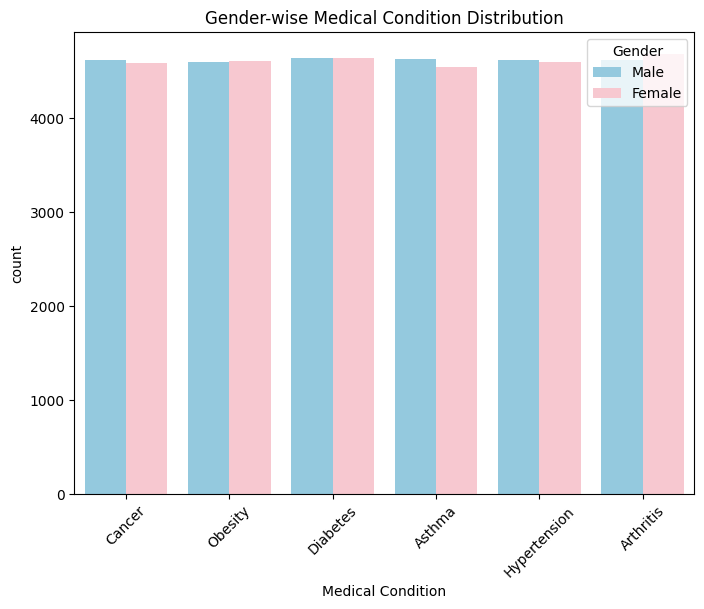

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x='Medical Condition', hue='Gender', data=df, palette=['skyblue','pink'])
plt.title('Gender-wise Medical Condition Distribution')
plt.xticks(rotation=45)
plt.show()


In [46]:
GenderBillingByMC = df.groupby(['Medical Condition', 'Gender'])['Billing Amount'].sum().reset_index()
GenderBillingByMC[ 'Billing Amount' ] = GenderBillingByMC[ 'Billing Amount' ].astype( int )
GenderBillingByMC[ 'Billing Amount' ] = ( GenderBillingByMC[ 'Billing Amount' ] / 10000000 ).round( 2 )
GenderBillingByMC.rename(columns={'Billing Amount': 'Billing Amount (in Crores)'}, inplace=True)
GenderBillingByMC

,Medical Condition,Gender,Billing Amount (in Crores)
0,Arthritis,Female,11.87
1,Arthritis,Male,11.86
2,Asthma,Female,11.55
3,Asthma,Male,11.99
4,Cancer,Female,11.63
5,Cancer,Male,11.59
6,Diabetes,Female,11.88
7,Diabetes,Male,11.98
8,Hypertension,Female,11.74
9,Hypertension,Male,11.83


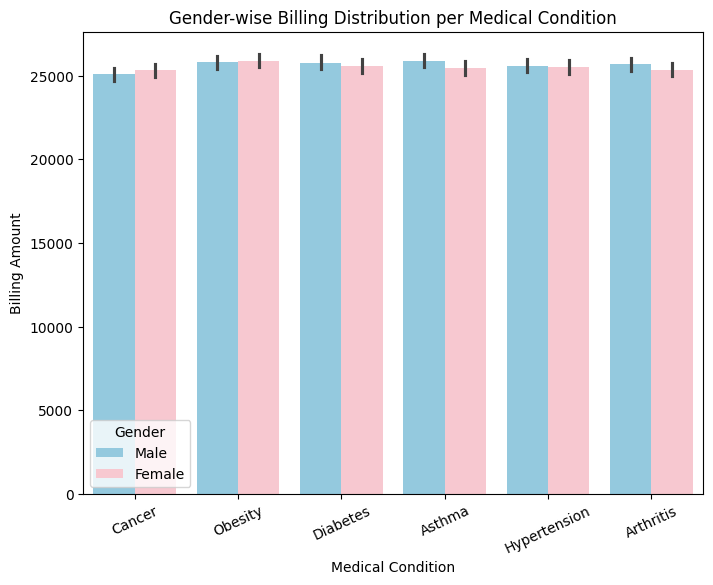

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(x='Medical Condition', y='Billing Amount', hue='Gender', data=df, palette=['skyblue','pink'])
plt.title('Gender-wise Billing Distribution per Medical Condition')
plt.xticks(rotation=25)
plt.show()


### Which hospital handles the most patients?

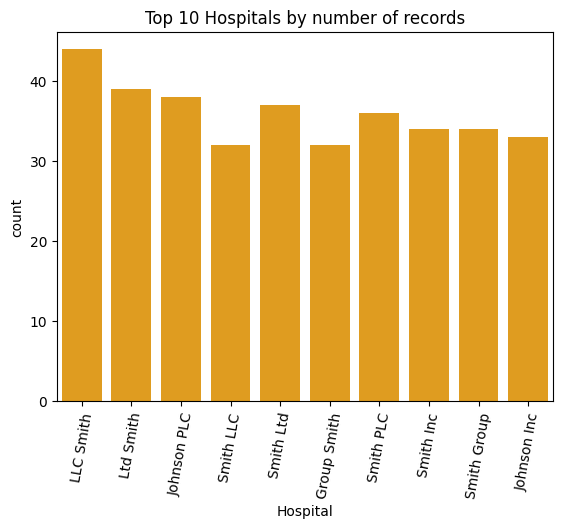

In [48]:
# Which hospital handles the most patients?
#Top 10 hospitals

top10 = df[ 'Hospital' ] .value_counts().nlargest ( 10 ) .index

sns.countplot( x = 'Hospital' , data = df [ df [ 'Hospital' ] .isin ( top10 ) ] , color = 'orange')
plt.xticks( rotation = 80 )
plt.title( 'Top 10 Hospitals by number of records')
plt.show()

### Insights :
The top 10 hospitals include multiple branches of the Smith group such as Smith Ltd, Smith PLC, Smith Inc, and Smith LLC, indicating that the Smith network dominates the high-billing hospitals. Johnson PLC and Johnson Inc also appear among the top contributors.

In [49]:
#First we check how many insurance provider
df [ 'Insurance Provider' ] .nunique()

5

### Which insurance provider covers the most patients?

In [50]:
df ['Insurance Provider' ] .value_counts()

Insurance Provider
Cigna               11225
Medicare            11132
UnitedHealthcare    11106
Blue Cross          11043
Aetna               10886
Name: count, dtype: int64

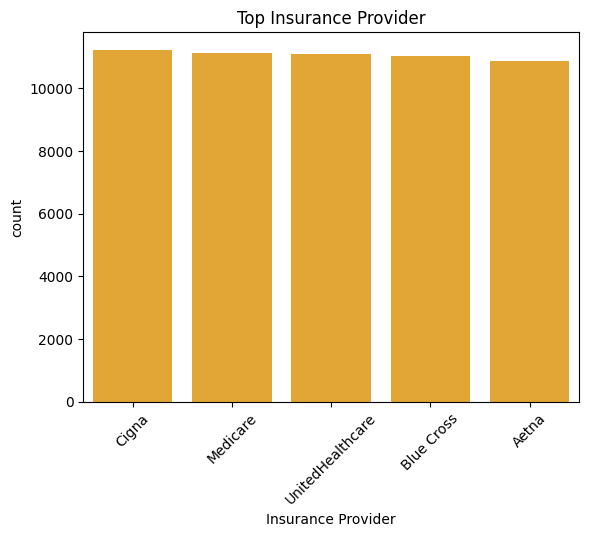

In [51]:
#Which Insurance provider is more popular?
#Top Insurance provider

desc = df [ 'Insurance Provider' ] .value_counts ()
sns.countplot ( x = 'Insurance Provider' , data = df , order = desc.index  , color = 'orange' , alpha = 0.9)
plt.title( 'Top Insurance Provider' )
plt.xticks ( rotation = 45 )
plt.show()

### Insights:
- Cigna covers the highest number of patients, followed closely by Medicare, UnitedHealthcare, Blue Cross, and Aetna.

### Average Billing Amount by Insurance provider

In [52]:
df.groupby( 'Insurance Provider' ) ['Billing Amount' ] .mean().reset_index()

,Insurance Provider,Billing Amount
0,Aetna,25618.326639
1,Blue Cross,25650.841414
2,Cigna,25581.443852
3,Medicare,25667.554064
4,UnitedHealthcare,25433.072512


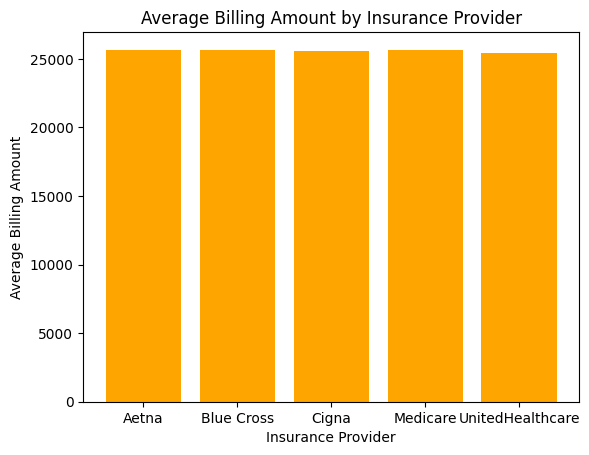

In [53]:
#Average Billing Amount by Insurance provider

BillByInsurance = df.groupby ( 'Insurance Provider' ) [ "Billing Amount" ] .mean () .reset_index()
BillByInsurance

plt.bar ( BillByInsurance [ 'Insurance Provider' ] , BillByInsurance [ 'Billing Amount' ] , color = 'orange')
plt.xlabel('Insurance Provider')
plt.ylabel ( 'Average Billing Amount' )
plt.title('Average Billing Amount by Insurance Provider')
plt.show()

### Insights
- Medicare has the highest average billing per patient, followed closely by Blue Cross and Aetna.
- Cigna and UnitedHealthcare have slightly lower averages, but overall the differences among providers are small,
 indicating fairly similar billing patterns.

### How are numeric features correlated with each other?

In [54]:
df.corr( numeric_only = True )

,Age,Billing Amount,Room Number,Stay Duration
Age,1.000000,-0.003756,-0.000686,0.008347
Billing Amount,-0.003756,1.000000,-0.002709,-0.005565
Room Number,-0.000686,-0.002709,1.000000,-0.005539
Stay Duration,0.008347,-0.005565,-0.005539,1.000000


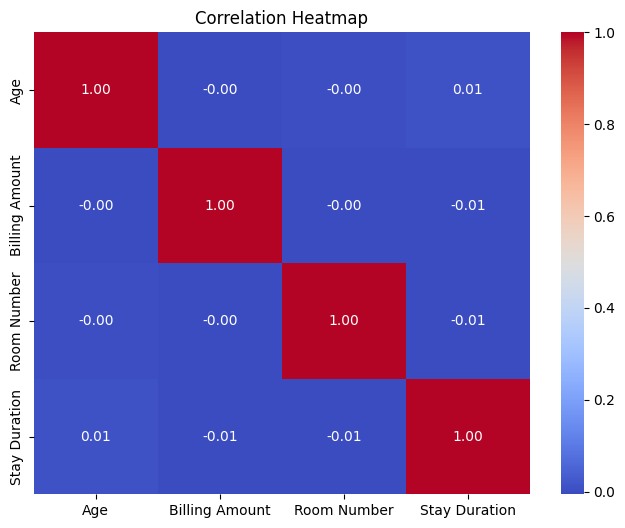

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Insights

- All numeric features show very weak correlations with each other.